**UNR - TUIA**

# Trabajo Prático N°:1 - Aprendizaje Automático

### Integrantes:
*   Crenna, Giuliano. Legajo: C-7438/1.
*   Pace, Bruno. Legajo: P-5295/7.
*   Sancho Almenar, Mariano. Legajo: S-5778/9.



In [164]:
#Tratamiento de datos:
import numpy as np
import pandas as pd

#Gráficos:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Preprocesado y modelado:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Configuración de warnings:
import warnings
warnings.filterwarnings('ignore')

# Descarga y lectura del df

Descargamos el df para no tener que importarlo. Es una cuestion de prolijidad y comodidad.

In [165]:
!wget -O house-prices-tp.csv 'https://drive.google.com/uc?export=download&id=1Xd52dYjAl0s7FjE-q9MNnRnRKIeooUe8'

--2024-09-30 19:33:01--  https://drive.google.com/uc?export=download&id=1Xd52dYjAl0s7FjE-q9MNnRnRKIeooUe8
Resolving drive.google.com (drive.google.com)... 142.251.133.238, 2800:3f0:4002:801::200e
Connecting to drive.google.com (drive.google.com)|142.251.133.238|:443... connected.


HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Xd52dYjAl0s7FjE-q9MNnRnRKIeooUe8&export=download [following]
--2024-09-30 19:33:02--  https://drive.usercontent.google.com/download?id=1Xd52dYjAl0s7FjE-q9MNnRnRKIeooUe8&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 216.58.202.65, 2800:3f0:4002:80f::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|216.58.202.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46889 (46K) [application/octet-stream]
Saving to: ‘house-prices-tp.csv’

house-prices-tp.csv 100%[===================>]  45.79K  --.-KB/s    in 0.05s   

2024-09-30 19:33:04 (956 KB/s) - ‘house-prices-tp.csv’ saved [46889/46889]



In [166]:
data: pd.DataFrame = pd.read_csv('house-prices-tp.csv')

El dataset contiene información de las casas de Boston. Contamos con los siguientes 14 atributos numéricos:

---
1. **CRIM**: tasa de criminalidad per cápita por ciudad

2. **ZN**: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados

3. **INDUS**: proporción de acres de negocios no minoristas por ciudad

4. **CHAS**: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)

5. **NOX**: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]

6. **RM**: número promedio de habitaciones por vivienda

7. **AGE**: proporción de unidades ocupadas por sus propietarios construidas antes de 1940

8. **DIS**: distancias ponderadas a cinco centros de empleo de Boston

9. **RAD**: índice de accesibilidad a las autopistas radiales

10. **TAX**: tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]

11. **PTRATIO**: proporción alumno-maestro por ciudad

12. **B**: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

13. **LSTAT**: % de población de menor estatus socioeconómico

14. **MEDV**: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]
---
En este caso, nuestro **target** será la variable **MEDV**


In [167]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
1,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
3,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
4,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5


---
Contamos con 556 tuplas, en las que se observan valores faltantes.

In [168]:
data.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)

Observamos datos faltantes.

In [169]:
data.isna().sum()

CRIM       23
ZN         22
INDUS      15
CHAS       23
NOX        24
RM         21
AGE        24
DIS        15
RAD        28
TAX        18
PTRATIO    28
B          22
LSTAT      22
MEDV       21
dtype: int64

# Visulización de las distribuciones

In [170]:
def plot_all_hist(data_: pd.DataFrame) -> None:
  """
  Función para graficar todas las distribuciones de todas las columnas del dataset, agregando además su gráfico de densidad.
  """

  fig, axes = plt.subplots(3, 5, figsize=(20, 10))

  plt.subplots_adjust(hspace=0.5, wspace=0.3)

  for i, column in enumerate(data_.columns):
      row = i // 5
      col = i % 5
      sns.histplot(data_[column], kde=True, ax=axes[row, col])
      axes[row, col].set_title(f'Distribución de {column}')
      axes[row, col].set_xlabel(column)
      axes[row, col].set_ylabel('Frecuencia')

  plt.show()

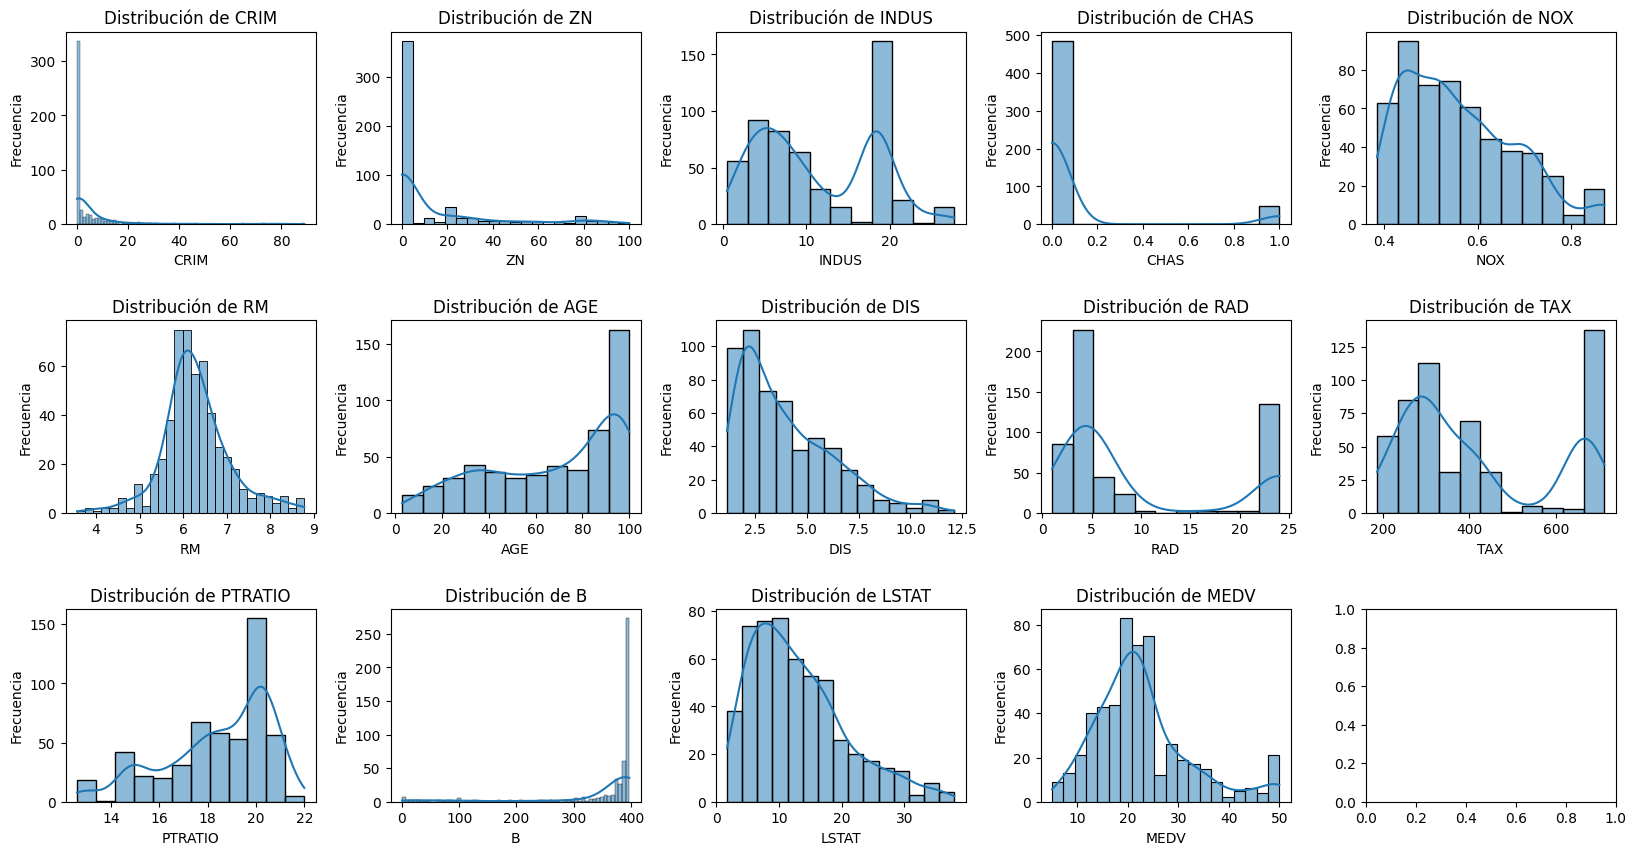

In [171]:
plot_all_hist(data)

# Limpieza Previa

Quitamos todos los que no tengan al menos 9 variables, es decir los que tienen 5 o mas nulos.

In [172]:
data: pd.DataFrame = data.dropna(thresh = len(data.columns) - 5)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     525 non-null    float64
 1   ZN       524 non-null    float64
 2   INDUS    530 non-null    float64
 3   CHAS     527 non-null    float64
 4   NOX      527 non-null    float64
 5   RM       528 non-null    float64
 6   AGE      523 non-null    float64
 7   DIS      529 non-null    float64
 8   RAD      521 non-null    float64
 9   TAX      525 non-null    float64
 10  PTRATIO  523 non-null    float64
 11  B        527 non-null    float64
 12  LSTAT    527 non-null    float64
 13  MEDV     527 non-null    float64
dtypes: float64(14)
memory usage: 62.2 KB


Imputamos mediante KNN porque consideramos que es más correcto y eficiente que utilizar media, mediana o moda en cada caso. Se probó hacerlo de esta manera y los resultados fueron inferiores.

In [173]:
knn_imputer: KNNImputer = KNNImputer(n_neighbors=5)

data: pd.DataFrame = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

In [174]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Separación del Dataset
Antes de continuar, separamos al dataset en conjuntos de entrenamiento, test y validación teniendo en cuenta que nuestra variable a predecir es **MEDV**

In [175]:
X = data.drop(columns='MEDV')
y = data['MEDV'] # MEDV es lo que quiero predecir.

In [176]:
# Obtenemos el conjunto de test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.31,
    random_state=42,
    )

# Realizamos una segunda separación sobre el conjunto de entrenamiento para obtener así, el conjunto final de entrenamiento y uno de validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.125,
    random_state=42
)

## Matriz de correlación

Podemos observar que existe una única correlación fuerte:
- RAD - TAX

Por otro lado, destacamos las siguientes:
- AGE - DIS
- TAX - INDUS

A su vez, vemos que CHAS no tiene correlación con ninguna variable.

In [177]:
corr_matrix = X_train.corr()

fig = px.imshow(corr_matrix, title='Correlación entre las características', aspect='auto', color_continuous_scale='RdBu',
          zmin= -1, zmax=1, text_auto=True)

fig.show()

## Estandarización de datos
Estandarizamos en base al Z-score mediante StandardScaler.

In [178]:
scaler: StandardScaler = StandardScaler()

In [179]:
# Ajustar y transformar el conjunto de entrenamiento
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# Transformar el conjunto de validación y el conjunto de test
X_val = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

En el Box podemos ver que todas las variables acotaron su dominio. De esta forma podemos proseguir con el análisis ya que ahora tienen un rango similar.

In [180]:
px.box(X_train, title='Distribución de los datos estandarizados')

Comprobamos que sd = 1 y que la media es muy cercana a 0.

In [181]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02
mean,4.857226e-17,1.942890e-17,-2.220446e-17,-2.220446e-17,2.997602e-16,-4.579670e-16,1.776357e-16,-1.436351e-16,5.551115e-17,-3.330669e-17,8.215650e-16,-3.302913e-16,-1.457168e-16
std,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00
min,-4.331288e-01,-5.423605e-01,-1.573391e+00,-2.996930e-01,-1.455425e+00,-3.492099e+00,-2.196452e+00,-1.261605e+00,-1.017570e+00,-1.341778e+00,-2.637724e+00,-3.422324e+00,-1.504412e+00
25%,-4.272415e-01,-5.423605e-01,-9.103221e-01,-2.996930e-01,-8.939523e-01,-5.500421e-01,-8.688657e-01,-8.080528e-01,-6.759396e-01,-7.944605e-01,-6.915468e-01,2.187397e-01,-7.887981e-01
50%,-4.062145e-01,-5.423605e-01,-2.330544e-01,-2.996930e-01,-1.921109e-01,-9.959425e-02,2.926787e-01,-2.531141e-01,-5.620627e-01,-3.763869e-01,2.303265e-01,4.404606e-01,-1.704858e-01
75%,-4.436960e-02,2.476213e-01,9.312214e-01,-2.996930e-01,6.830149e-01,4.427233e-01,9.264932e-01,6.048616e-01,1.601598e+00,1.469299e+00,8.221463e-01,4.928619e-01,6.206918e-01
max,5.819198e+00,3.346878e+00,2.299955e+00,3.417430e+00,2.557456e+00,3.144139e+00,1.121250e+00,3.704551e+00,1.601598e+00,1.733388e+00,1.641589e+00,5.079506e-01,3.306944e+00


# Regresión Lineal

In [182]:
#Creamos y ajustamos el modelo.
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluar el modelo.
linear_mse: np.float64 = mean_squared_error(y_test, y_pred)
linear_r2: np.float64 = r2_score(y_test, y_pred)

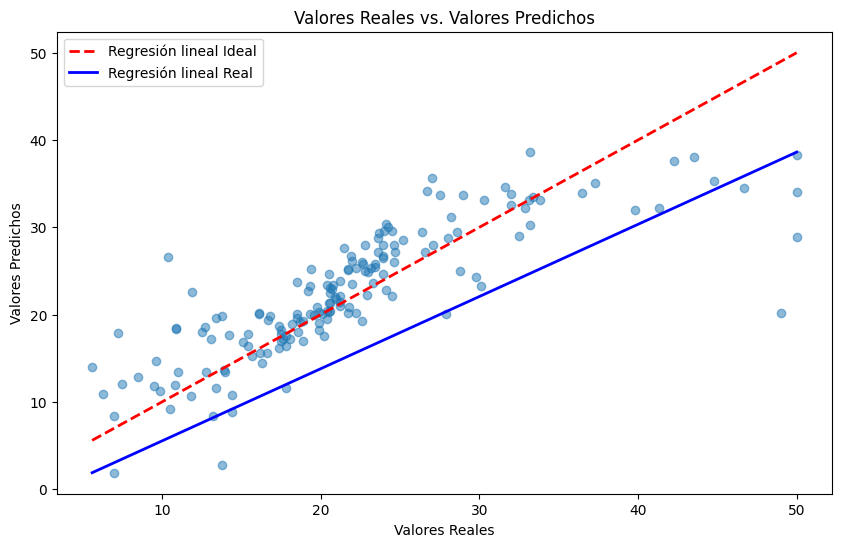

Mean Squared Error: 27.158550304204102
R^2 Score: 0.6509438642212195


In [183]:
# Grafica de la regresión

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label = 'Regresión lineal Ideal')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'b', lw=2, label = 'Regresión lineal Real')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

print(f'Mean Squared Error: {linear_mse}')
print(f'R^2 Score: {linear_r2}')

### Analisis del peso de los coeficientes

El siguiente gráfico nos revela que las variables **LSTAT** y **RM** tienen el mayor peso en el modelo de regresión, lo que sugiere que el porcentaje de población de bajo estatus socioeconómico y el número promedio de habitaciones por vivienda son factores determinantes en las predicciones.

**DIS** y **TAX** también tienen una influencia significativa, lo que indica que la ubicación y las cargas fiscales juegan un rol importante.

Si bien no existe ninguna variable que no aporte a la regresión, podemos destacar a **INDUS**, **CRIM** y **AGE** como aquellas que no presentan una fuerte influencia a la hora de realizar la predicción.

In [184]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': model.coef_.flatten()}
                  )

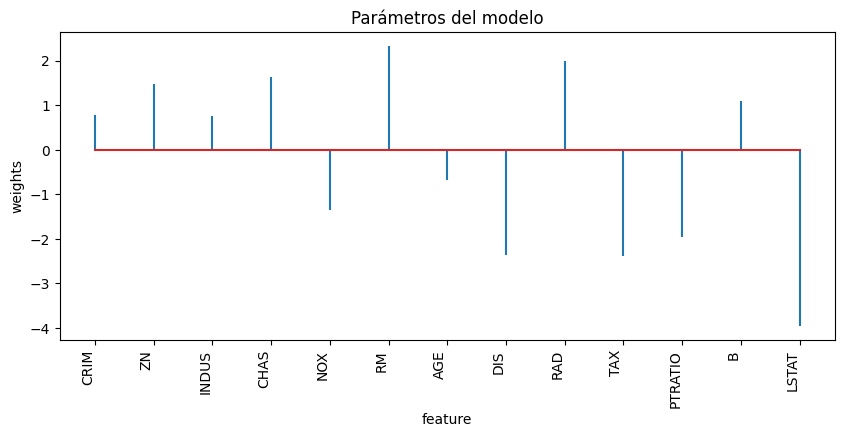

In [185]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

# Modelos de Gradiente Descendiente

## Funciones

In [186]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_val = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_val.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((o, 1)), X_val))


    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for _ in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train

        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_val, W)
        error_test = y_val - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de validación')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y validación vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

In [187]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)



    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

In [188]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

## Gradiende Descendiente

Hacemos reshape a los conjuntos de datos para poder utilizar las funciones.

In [189]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((320, 13), (320,), (46, 13), (46,))

In [190]:
y_val = y_val.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

### **Análisis Descenso del Gradiente:**
**Inicio del entrenamiento:** Durante las primeras iteraciones, el modelo aprende rápidamente, lo que resulta en una fuerte disminución del error tanto en los conjuntos de entrenamiento como de validación.

**Convergencia:** Después de unas 50 épocas, ambas curvas se estabilizan, lo que indica que el modelo ha alcanzado una convergencia, es decir, no hay mejoras significativas en la reducción del error. El modelo ha aprendido lo suficiente de los datos, y más entrenamiento no aportaría un beneficio notable.

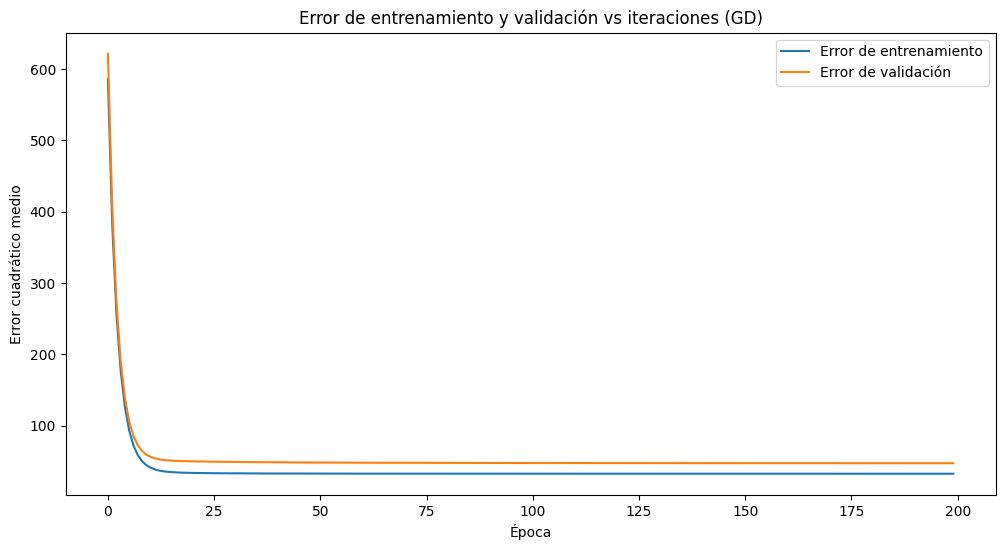

In [191]:
w_gd = gradient_descent(X_train, y_train, X_val, y_val, lr=0.1, epochs=200)

Obtención de los hiperparámetros mediante GridSearchCV

In [192]:
gd = SGDRegressor()

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(gd, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros para Gradiente Descendente Estándar:", grid_search.best_params_)

Mejores hiperparámetros para Gradiente Descendente Estándar: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'invscaling'}


## Gradiente Estocástico

El modelo entrenado mediante SGD muestra que el error de entrenamiento tiene fluctuaciones debido a la naturaleza estocástica del algoritmo, pero el error de prueba se mantiene bajo y estable, lo cual sugiere un buen rendimiento general del modelo.

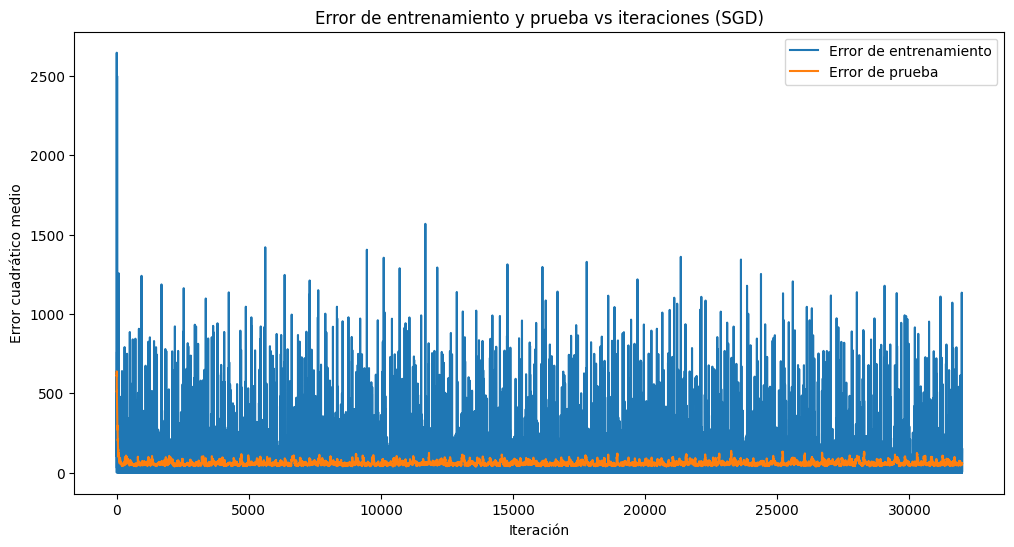

In [193]:
w_sdg = stochastic_gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100)

In [194]:
gd_stochastic = SGDRegressor()

param_grid_stochastic = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1],
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4]
}

grid_search_stochastic = GridSearchCV(gd_stochastic, param_grid_stochastic, cv=5)
grid_search_stochastic.fit(X_train, y_train)

print("Mejores hiperparámetros para Gradiente Descendente Estocástico:", grid_search_stochastic.best_params_)

Mejores hiperparámetros para Gradiente Descendente Estocástico: {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'optimal', 'max_iter': 2000, 'tol': 0.0001}


## Gradiente Mini-Batch

 Vemos como a partir de las 200 oscilaciones, el error de entrenamiento fluctua debido a la naturaleza del método.

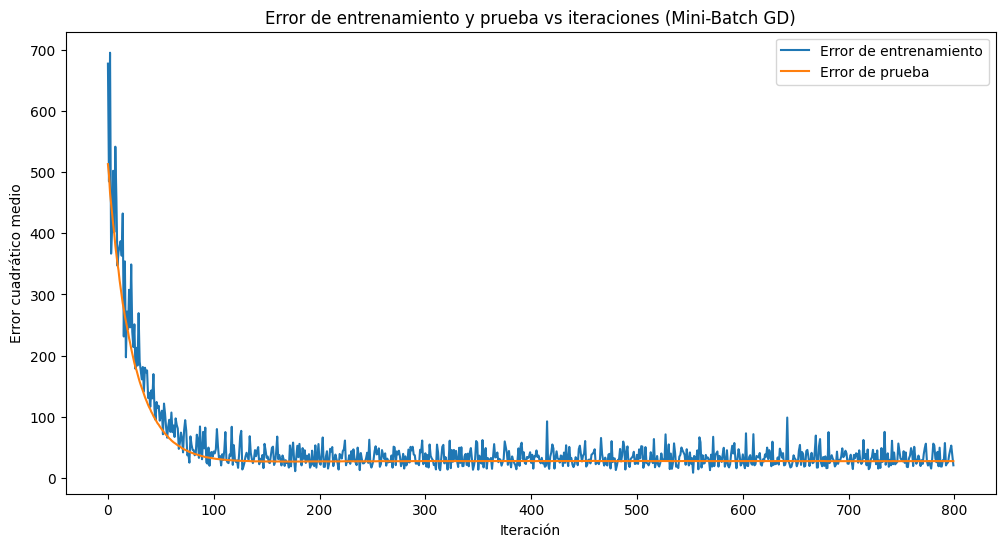

In [195]:
w_mbgd = mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr= 0.01, epochs=100, batch_size = 40)

In [196]:
gd_minibatch = SGDRegressor()

param_grid_minibatch = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1],
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4]
}

grid_search_minibatch = GridSearchCV(gd_minibatch, param_grid_minibatch, cv=5)
grid_search_minibatch.fit(X_train, y_train)

print("Mejores hiperparámetros para Gradiente Descendente Mini-Batch:", grid_search_minibatch.best_params_)

Mejores hiperparámetros para Gradiente Descendente Mini-Batch: {'alpha': 0.01, 'eta0': 1, 'learning_rate': 'optimal', 'max_iter': 1000, 'tol': 0.001}


#Regularización de Lasso, Ridge y ElasticNet

### Función gráfica

In [197]:
def scatter_modelos(y_test, lasso_pred, ridge_pred, elasticnet_pred):
  """
  Función para graficar los valores reales frente a los predichos para cada modelo.
  """

  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  # Graficar los valores reales frente a los predichos para Lasso
  axes[0].scatter(y_test, lasso_pred, alpha=0.5, label='Predicciones Lasso', color='blue')
  axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea de referencia')
  axes[0].plot([y_test.min(), y_test.max()], [lasso_pred.min(), lasso_pred.max()], 'b-', lw=2)  # Línea de regresión Lasso
  axes[0].set_xlabel('Valores Reales')
  axes[0].set_ylabel('Valores Predichos')
  axes[0].set_title('Lasso')
  axes[0].legend()
  axes[0].grid()

  # Graficar los valores reales frente a los predichos para Ridge
  axes[1].scatter(y_test, ridge_pred, alpha=0.5, label='Predicciones Ridge', color='green')
  axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea de referencia')
  axes[1].plot([y_test.min(), y_test.max()], [ridge_pred.min(), ridge_pred.max()], 'g-', lw=2)  # Línea de regresión Ridge
  axes[1].set_xlabel('Valores Reales')
  axes[1].set_title('Ridge')
  axes[1].legend()
  axes[1].grid()

  # Graficar los valores reales frente a los predichos para ElasticNet
  axes[2].scatter(y_test, elasticnet_pred, alpha=0.5, label='Predicciones ElasticNet', color='orange')
  axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea de referencia')
  axes[2].plot([y_test.min(), y_test.max()], [elasticnet_pred.min(), elasticnet_pred.max()], 'orange', lw=2)  # Línea de regresión ElasticNet
  axes[2].set_xlabel('Valores Reales')
  axes[2].set_title('ElasticNet')
  axes[2].legend()
  axes[2].grid()

  plt.tight_layout()
  plt.show()

Creo un df para comparar de forma prolija.

In [198]:
metricas_ranking: pd.DataFrame = pd.DataFrame(
    columns=['Modelo', 'Alpha', 'L1_Ratio', 'MSE', 'R2'],
    data=[['Regresión Lineal', None, None, linear_mse, linear_r2]]
)

## Modelos

Creamos y trabajamos con todos los modelos sin especificar alpha y l_ratio. Evaluamos su desempeño y los agregamos al df para comparar en un futuro.

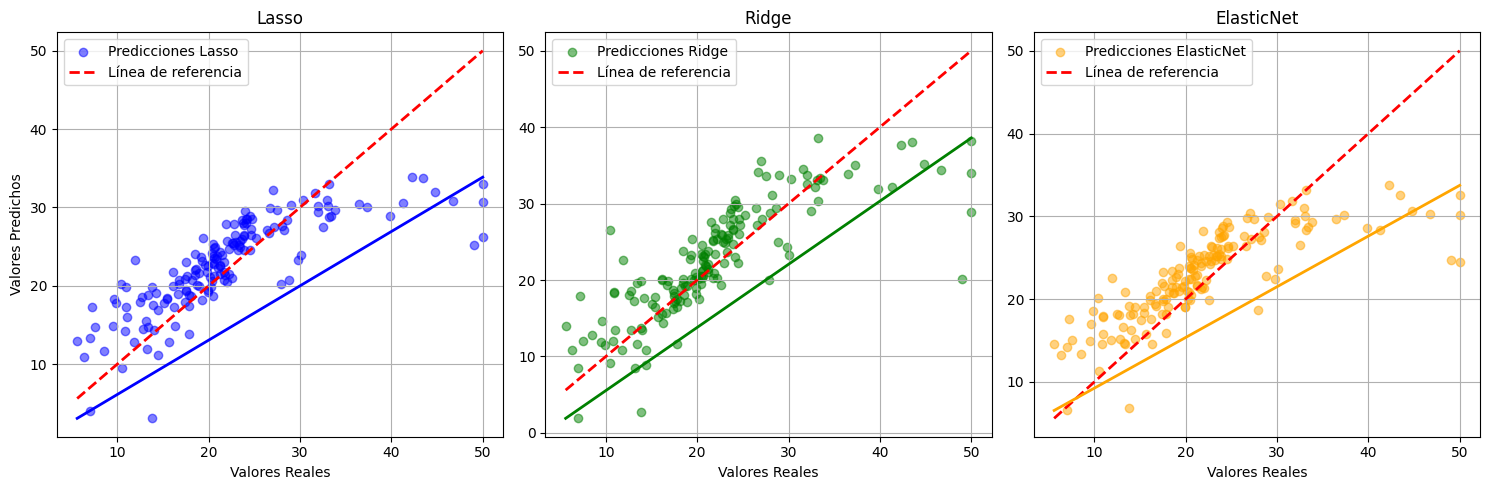

Lasso MSE: 30.77357362709212
Lasso R2: 0.6044816614267601

Ridge MSE: 27.163970121563477
Ridge R2: 0.6508742058453894

ElasticNet MSE: 32.54011484272005
ElasticNet R2: 0.5817771339938071


In [199]:
lasso = Lasso()
ridge = Ridge()
elasticnet = ElasticNet()

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elasticnet.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
elasticnet_pred = elasticnet.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
elasticnet_mse = mean_squared_error(y_test, elasticnet_pred)
elasticnet_r2 = r2_score(y_test, elasticnet_pred)

scatter_modelos(y_test, lasso_pred, ridge_pred, elasticnet_pred)

print(f'Lasso MSE: {lasso_mse}')
print(f'Lasso R2: {lasso_r2}\n')
print(f'Ridge MSE: {ridge_mse}')
print(f'Ridge R2: {ridge_r2}\n')
print(f'ElasticNet MSE: {elasticnet_mse}')
print(f'ElasticNet R2: {elasticnet_r2}')

Ahora, probamos con el conjunto de validación.

In [200]:
lasso_pred_val = lasso.predict(X_val)
ridge_pred_val = ridge.predict(X_val)
elasticnet_pred_val = elasticnet.predict(X_val)

# Obtención de métricas
lasso_mse = mean_squared_error(y_val, lasso_pred_val)
lasso_r2 = r2_score(y_val, lasso_pred_val)
ridge_mse = mean_squared_error(y_val, ridge_pred_val)
ridge_r2 = r2_score(y_val, ridge_pred_val)
elasticnet_mse = mean_squared_error(y_val, elasticnet_pred_val)
elasticnet_r2 = r2_score(y_val, elasticnet_pred_val)

print(f'Lasso MSE: {lasso_mse}')
print(f'Lasso R2: {lasso_r2}\n')
print(f'Ridge MSE: {ridge_mse}')
print(f'Ridge R2: {ridge_r2}\n')
print(f'ElasticNet MSE: {elasticnet_mse}')
print(f'ElasticNet R2: {elasticnet_r2}')


Lasso MSE: 52.9828078531631
Lasso R2: 0.4233255537238305

Ridge MSE: 47.26513245649648
Ridge R2: 0.48555776501956993

ElasticNet MSE: 49.71754798060971
ElasticNet R2: 0.4588652316920323


###Analisis de coeficientes de los modelos por default
A partir del siguiente gráfico podemos observar:


*   **Lasso**: Es el modelo que menos coeficientes utilza, siendo estos *ZN*, *CHAS*, *RM*, *TAX*, *PTRATIO*, *B*  y *LSTAT*.
*  **Ridge**: Utiliza todas los coeficientes, destacando entre ellos *LSTAT* y *RM*.

*   **ElasticNet**: Tambien se observa una relevancia de *LSTAT* y *RM*; aunque se descartaron otras variables como *RAD*, *DIS* e *INDUS*






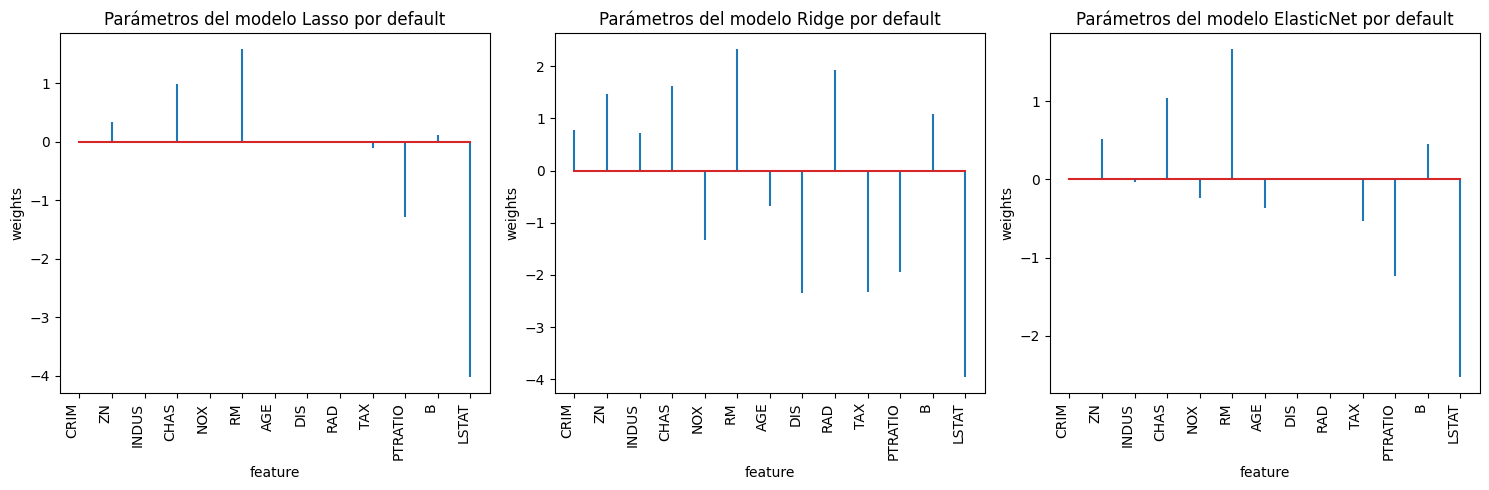

In [201]:
df_coeficientes_lasso = pd.DataFrame({
    'predictor': X_train.columns,
    'coef': lasso.coef_.flatten()
})

df_coeficientes_ridge = pd.DataFrame({
    'predictor': X_train.columns,
    'coef': ridge.coef_.flatten()
})

df_coeficientes_elasticnet = pd.DataFrame({
    'predictor': X_train.columns,
    'coef': elasticnet.coef_.flatten()
})

# Create subplots with 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Lasso coefficients
axs[0].stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
axs[0].set_xticklabels(df_coeficientes_lasso.predictor, rotation=90, ha='right', size=10)
axs[0].set_xlabel('feature')
axs[0].set_ylabel('weights')
axs[0].set_title('Parámetros del modelo Lasso por default')

# Plot Ridge coefficients
axs[1].stem(df_coeficientes_ridge.predictor, df_coeficientes_ridge.coef, markerfmt=' ')
axs[1].set_xticklabels(df_coeficientes_ridge.predictor, rotation=90, ha='right', size=10)
axs[1].set_xlabel('feature')
axs[1].set_ylabel('weights')
axs[1].set_title('Parámetros del modelo Ridge por default')

# Plot ElasticNet coefficients
axs[2].stem(df_coeficientes_elasticnet.predictor, df_coeficientes_elasticnet.coef, markerfmt=' ')
axs[2].set_xticklabels(df_coeficientes_elasticnet.predictor, rotation=90, ha='right', size=10)
axs[2].set_xlabel('feature')
axs[2].set_ylabel('weights')
axs[2].set_title('Parámetros del modelo ElasticNet por default')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Creo df auxiliar para luego concatenar con metricas_ranking. Por el momento observo que el modelo de regresión lineal es el que mejor se ajusta.

In [202]:
string: str = ' por default'

df_aux: pd.DataFrame = pd.DataFrame(
    columns=['Modelo', 'Alpha', 'L1_Ratio', 'MSE', 'R2'],
    data=[['Lasso' + string, 1.0, None , lasso_mse, lasso_r2], #1.0 por default
          ['Ridge' + string, 1.0, None, ridge_mse, ridge_r2], #1.0 por default
          ['Elastic Net' + string, 1.0, 0.5, elasticnet_mse, elasticnet_r2] #1.0 y 0.5 por default
          ]
)

metricas_ranking = pd.concat([metricas_ranking, df_aux], ignore_index=True)
metricas_ranking

,Modelo,Alpha,L1_Ratio,MSE,R2
0,Regresión Lineal,NaN,NaN,27.158550,0.650944
1,Lasso por default,1.0,NaN,52.982808,0.423326
2,Ridge por default,1.0,NaN,47.265132,0.485558
3,Elastic Net por default,1.0,0.5,49.717548,0.458865


## Obtención de los modelos mediante CV


In [203]:
ridge_cv = RidgeCV(alphas = np.logspace(-3, 6, 200),fit_intercept = True, store_cv_values = True)
ridge_cv.fit(X_train, y_train)
ridge_cv_pred = ridge_cv.predict(X_test)
ridge_cv_mse = mean_squared_error(y_test, ridge_cv_pred)
ridge_cv_r2 = r2_score(y_test, ridge_cv_pred)
best_ridge_cv_alpha = ridge_cv.alpha_

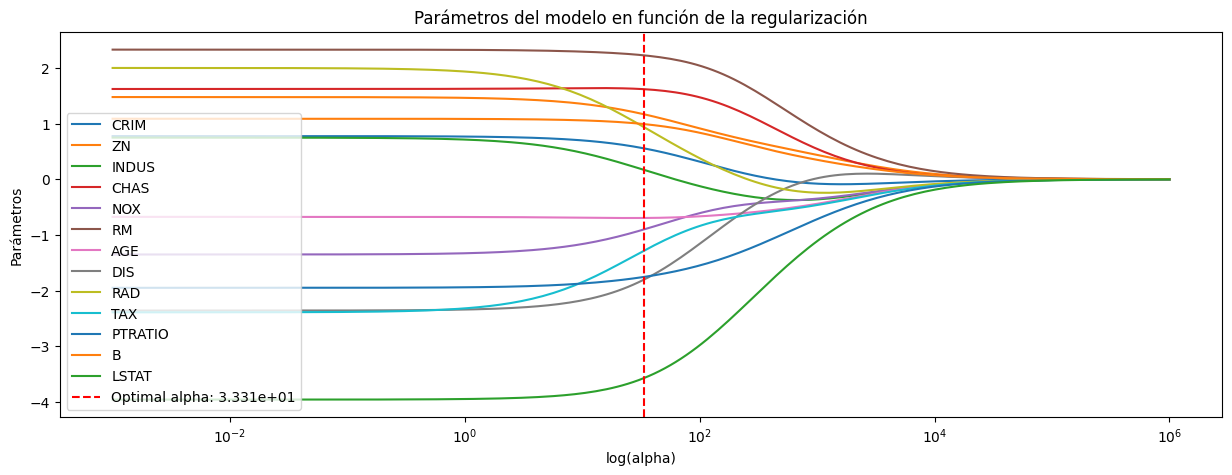

In [204]:
alphas = ridge_cv.alphas
coefs = []

for alpha in alphas:
    modelo_aux = Ridge(alpha = alpha)
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.axvline(ridge_cv.alpha_, color='red', linestyle='--', label=f'Optimal alpha: {ridge_cv.alpha_:.3e}')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

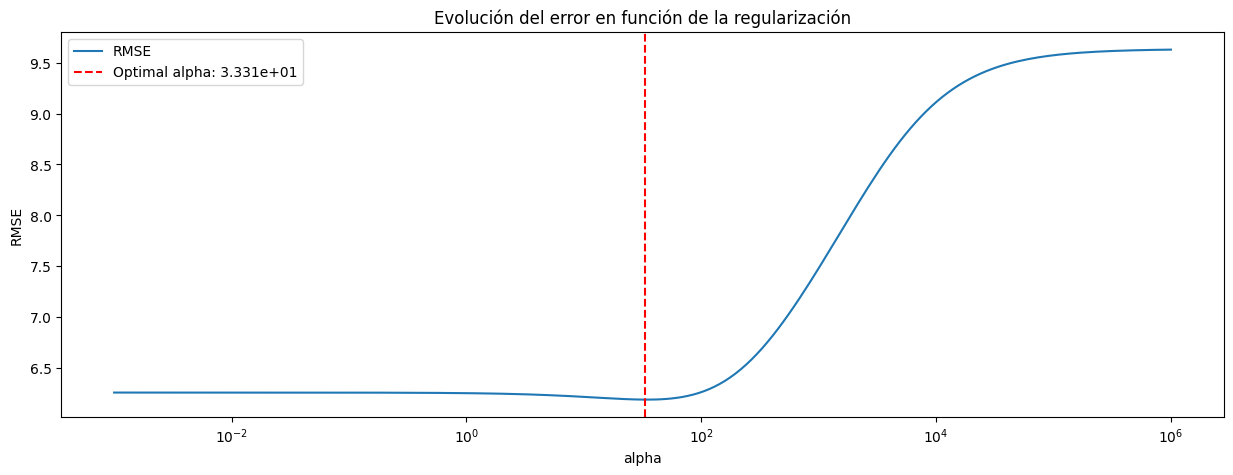

In [205]:
# Calcular el MSE promedio a partir de los valores de CV
mse_cv = ridge_cv.cv_values_.mean(axis=0)
rmse_cv = np.sqrt(mse_cv).flatten()

# Identificar el mejor alpha
optimo = ridge_cv.alpha_

# Graficar RMSE en función de los valores de alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ridge_cv.alphas, rmse_cv, label='RMSE')
ax.set_xscale('log')
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
ax.axvline(optimo, color='red', linestyle='--', label=f'Optimal alpha: {optimo:.3e}')
plt.legend()
plt.show()


In [206]:
lasso_cv = LassoCV(alphas=np.logspace(-3, 6, 200),cv=10)
lasso_cv.fit(X_train, y_train)
lasso_cv_pred = lasso_cv.predict(X_test)
lasso_cv_mse = mean_squared_error(y_test, lasso_cv_pred)
lasso_cv_r2 = r2_score(y_test, lasso_cv_pred)
best_lasso_cv_alpha = lasso_cv.alpha_

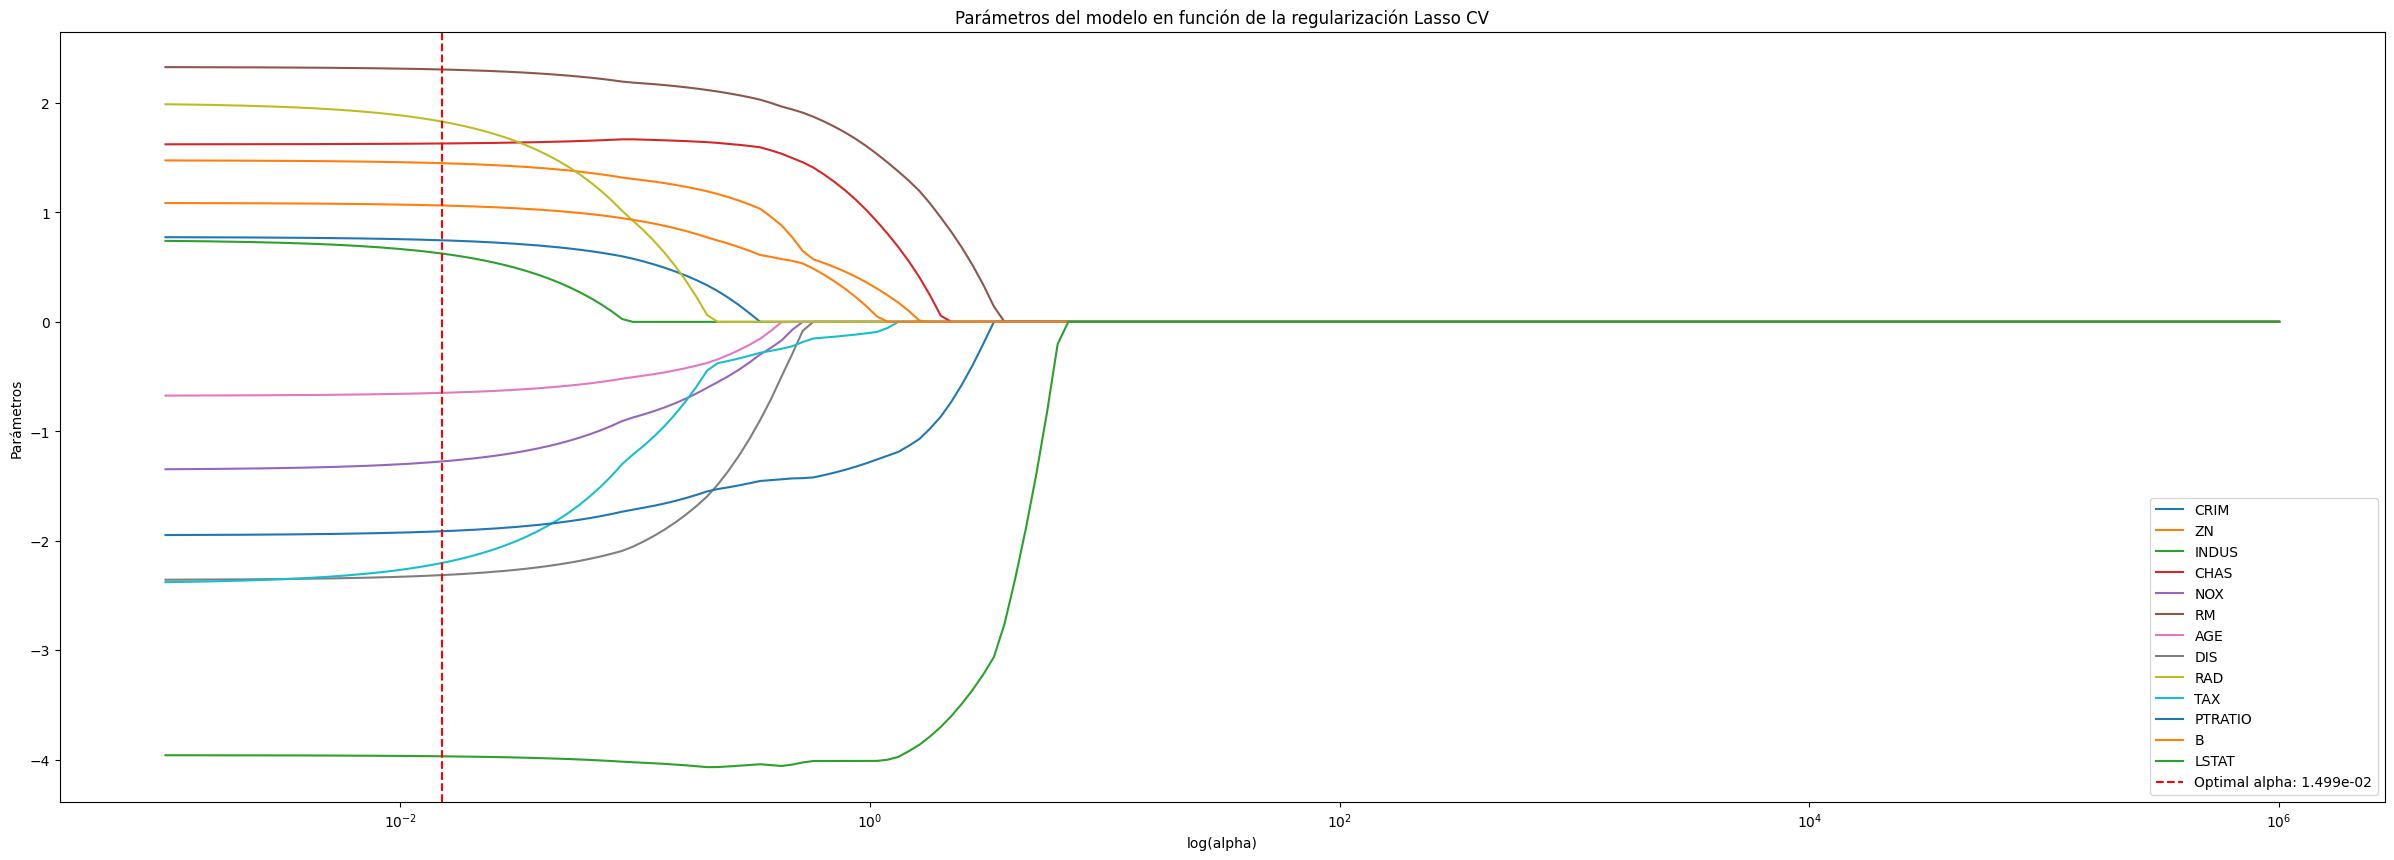

In [207]:
alphas = lasso_cv.alphas
coefs = []

for alpha in alphas:
    modelo_aux = Lasso(alpha = alpha)
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.coef_.flatten())

fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.axvline(lasso_cv.alpha_, color='red', linestyle='--', label=f'Optimal alpha: {lasso_cv.alpha_:.3e}')
ax.set_title('Parámetros del modelo en función de la regularización Lasso CV');
plt.axis('tight')
plt.legend()
plt.show()

In [208]:
elastic_cv = ElasticNetCV(alphas=np.logspace(-3, 6, 200), cv=10)
elastic_cv.fit(X_train, y_train)
elastic_cv_pred = elastic_cv.predict(X_test)
elastic_cv_mse = mean_squared_error(y_test, elastic_cv_pred)
elastic_cv_r2 = r2_score(y_test, elastic_cv_pred)

best_alpha_elastic = elastic_cv.alpha_
best_l1_ratio_elastic = elastic_cv.l1_ratio_

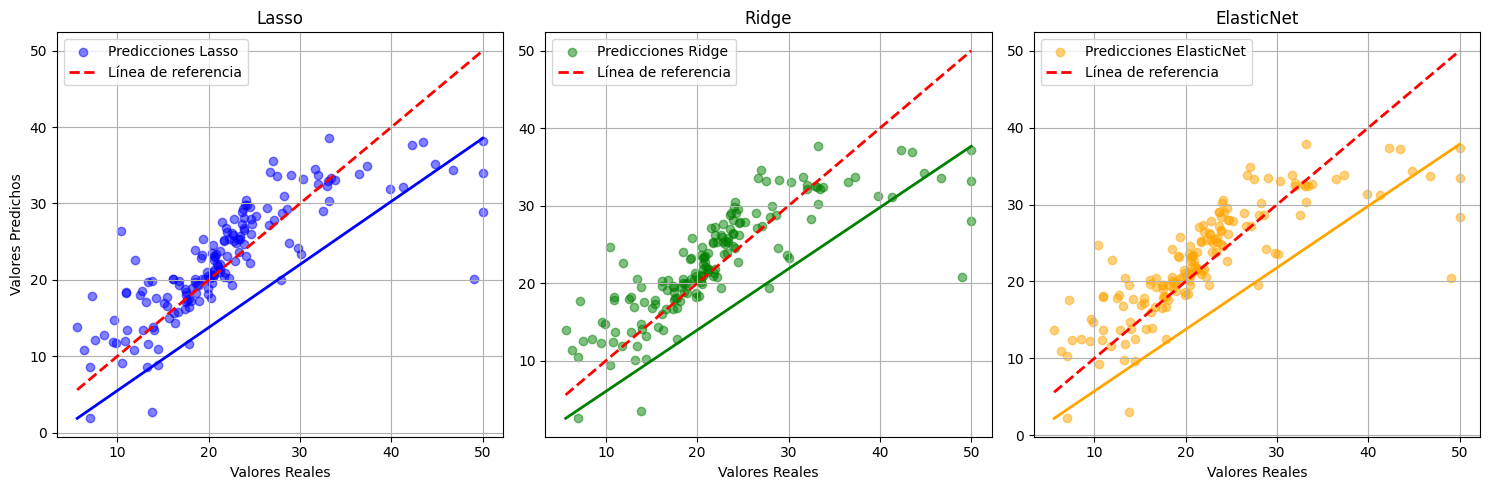

In [209]:
scatter_modelos(y_test, lasso_cv_pred, ridge_cv_pred, elastic_cv_pred)

Calculamos para conjunto de validación. Teniendo en cuenta tanto el paso por default como el cv, vemos que no encontramos un modelo óptimo. Tiene un error demasiado grande. Habría espacio para mejorar su rendimiento.

In [210]:
ridge_cv_pred_val = ridge_cv.predict(X_val)
ridge_cv_mse_val = mean_squared_error(y_val, ridge_cv_pred_val)
ridge_cv_r2_val = r2_score(y_val, ridge_cv_pred_val)
best_ridge_cv_alpha_val = ridge_cv.alpha_

lasso_cv_pred_val = lasso_cv.predict(X_val)
lasso_cv_mse_val = mean_squared_error(y_val, lasso_cv_pred_val)
lasso_cv_r2_val = r2_score(y_val, lasso_cv_pred_val)
best_lasso_cv_alpha_val = lasso_cv.alpha_

elastic_cv_pred_val = elastic_cv.predict(X_val)
elastic_cv_mse_val = mean_squared_error(y_val, elastic_cv_pred_val)
elastic_cv_r2_val = r2_score(y_val, elastic_cv_pred_val)


print(f'Ridge CV MSE: {ridge_cv_mse_val}')
print(f'Ridge CV R2: {ridge_cv_r2_val}')

print(f'Lasso CV MSE: {lasso_cv_mse_val}')
print(f'Lasso CV R2: {lasso_cv_r2_val}')

print(f'ElasticNet CV MSE: {elastic_cv_mse_val}')
print(f'ElasticNet CV R2: {elastic_cv_r2_val}')


Ridge CV MSE: 47.08192123741998
Ridge CV R2: 0.48755186900525016
Lasso CV MSE: 47.308770947227515
Lasso CV R2: 0.48508279580788916
ElasticNet CV MSE: 47.43799122310238
ElasticNet CV R2: 0.48367633899562823


Seguimos observando que la regresión lineal es el mejor modelo. No observamos mejoras significativas en los modelos por default y los calculados por CV.

In [211]:
string: str = ' CV'

df_aux: pd.DataFrame = pd.DataFrame(
    columns=['Modelo', 'Alpha', 'L1_Ratio', 'MSE', 'R2'],
    data=[['Lasso' + string, best_lasso_cv_alpha, None , lasso_cv_mse, lasso_r2], # 1.0 por default
          ['Ridge' + string, best_ridge_cv_alpha, None, ridge_cv_mse, ridge_r2], # 1.0 por default
          ['Elastic Net' + string, best_alpha_elastic, best_l1_ratio_elastic, elastic_cv_mse, elasticnet_r2] # 1.0 y 0.5 por default
          ]
)

metricas_ranking = pd.concat([metricas_ranking, df_aux], ignore_index=True)
metricas_ranking

,Modelo,Alpha,L1_Ratio,MSE,R2
0,Regresión Lineal,NaN,NaN,27.158550,0.650944
1,Lasso por default,1.000000,NaN,52.982808,0.423326
2,Ridge por default,1.000000,NaN,47.265132,0.485558
3,Elastic Net por default,1.000000,0.5,49.717548,0.458865
4,Lasso CV,0.014993,NaN,27.200785,0.423326
5,Ridge CV,33.312948,NaN,27.431267,0.485558
6,Elastic Net CV,0.108437,0.5,27.559361,0.458865


Analisis de los coeficientes de los modelos por CV

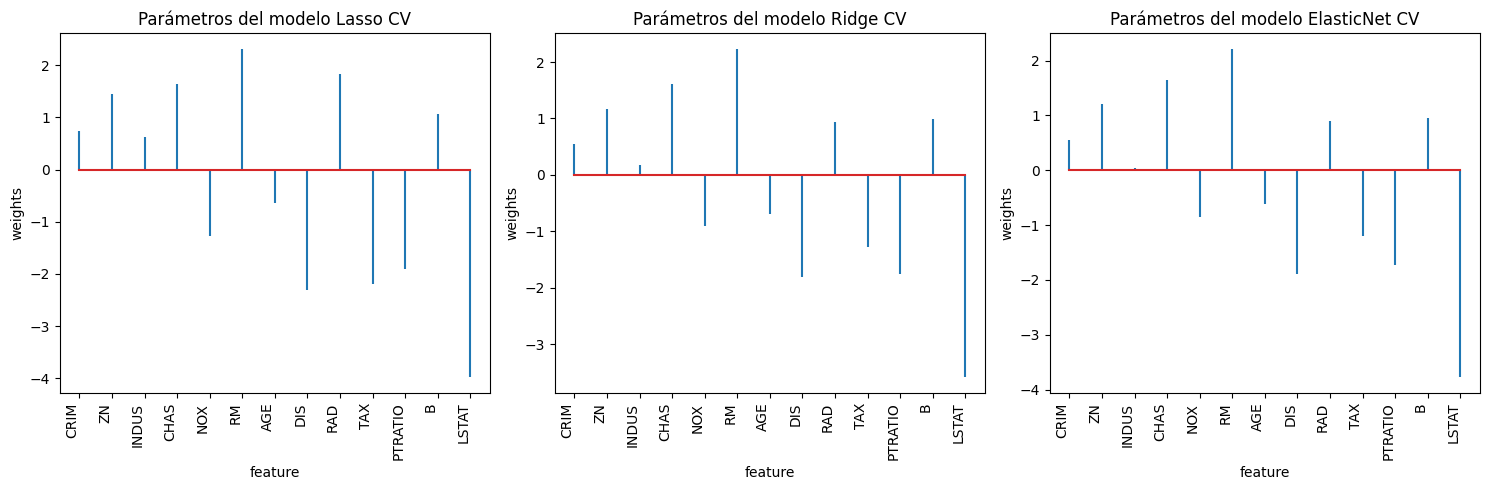

In [212]:
df_coeficientes_lasso_cv = pd.DataFrame({
    'predictor': X_train.columns,
    'coef': lasso_cv.coef_.flatten()
})

df_coeficientes_ridge_cv = pd.DataFrame({
    'predictor': X_train.columns,
    'coef': ridge_cv.coef_.flatten()
})

df_coeficientes_elastic_cv = pd.DataFrame({
    'predictor': X_train.columns,
    'coef': elastic_cv.coef_.flatten()
})


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Lasso
axs[0].stem(df_coeficientes_lasso_cv.predictor, df_coeficientes_lasso_cv.coef, markerfmt=' ')
axs[0].set_xticklabels(df_coeficientes_lasso_cv.predictor, rotation=90, ha='right', size=10)
axs[0].set_xlabel('feature')
axs[0].set_ylabel('weights')
axs[0].set_title('Parámetros del modelo Lasso CV')

# Plot Ridge
axs[1].stem(df_coeficientes_ridge_cv.predictor, df_coeficientes_ridge_cv.coef, markerfmt=' ')
axs[1].set_xticklabels(df_coeficientes_ridge_cv.predictor, rotation=90, ha='right', size=10)
axs[1].set_xlabel('feature')
axs[1].set_ylabel('weights')
axs[1].set_title('Parámetros del modelo Ridge CV')

# Plot ElasticNet
axs[2].stem(df_coeficientes_elastic_cv.predictor, df_coeficientes_elastic_cv.coef, markerfmt=' ')
axs[2].set_xticklabels(df_coeficientes_elastic_cv.predictor, rotation=90, ha='right', size=10)
axs[2].set_xlabel('feature')
axs[2].set_ylabel('weights')
axs[2].set_title('Parámetros del modelo ElasticNet CV')


plt.tight_layout()
plt.show()

Para seguir probando decidimos hacer un for a mano y tratar de ajustar los parametros alpha y l1_ratio (para el caso de elasticnet).

In [213]:
# DataFrame para almacenar todos los resultados
df_for: pd.DataFrame = pd.DataFrame(
    columns=['Modelo', 'Alpha', 'L1_Ratio', 'MSE', 'R2']
)

# Lista para almacenar los modelos junto con sus métricas
modelos_mse_r2 = []

# Definimos las listas de valores de alpha y l1_ratio
alpha_list: list[float] = [0.0001, 0.001, 0.01, 0.1, 1]
l1_ratio_list: list[float] = [x / 10.0 for x in range(1, 11)]
string: str = ' por FOR'

# Iteramos sobre los valores de alpha
for alpha_ in alpha_list:
    # Creamos Lasso y Ridge
    lasso = Lasso(alpha=alpha_)
    ridge = Ridge(alpha=alpha_)

    # Ajustamos los modelos
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)

    # Predicciones
    lasso_pred = lasso.predict(X_test)
    ridge_pred = ridge.predict(X_test)

    # Métricas de evaluación
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_r2 = r2_score(y_test, lasso_pred)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_r2 = r2_score(y_test, ridge_pred)

    # Guardar en la lista los resultados de Lasso y Ridge
    modelos_mse_r2.append(('Lasso', alpha_, None, lasso_mse, lasso_r2, lasso))
    modelos_mse_r2.append(('Ridge', alpha_, None, ridge_mse, ridge_r2, ridge))

    # Creamos un DataFrame temporal con los resultados de Lasso y Ridge
    temp_df_ = pd.DataFrame([
        {'Modelo': 'Lasso' + string, 'Alpha': alpha_, 'L1_Ratio': None, 'MSE': lasso_mse, 'R2': lasso_r2},
        {'Modelo': 'Ridge' + string, 'Alpha': alpha_, 'L1_Ratio': None, 'MSE': ridge_mse, 'R2': ridge_r2}
    ])

    # Concatenamos los resultados de Lasso y Ridge al DataFrame original
    df_for = pd.concat([df_for, temp_df_], ignore_index=True)

    # Iteramos sobre los valores de l1_ratio para ElasticNet
    for l1_ratio_ in l1_ratio_list:
        # Modelo de ElasticNet
        elasticnet = ElasticNet(alpha=alpha_, l1_ratio=l1_ratio_)

        # Ajustamos el modelo
        elasticnet.fit(X_train, y_train)

        # Predicciones
        elasticnet_pred = elasticnet.predict(X_test)

        # Métricas de evaluación
        elasticnet_mse = mean_squared_error(y_test, elasticnet_pred)
        elasticnet_r2 = r2_score(y_test, elasticnet_pred)

        # Guardar en la lista los resultados de ElasticNet
        modelos_mse_r2.append(('ElasticNet', alpha_, l1_ratio_, elasticnet_mse, elasticnet_r2, elasticnet))

        # Creamos un DataFrame temporal con los resultados de ElasticNet
        temp_df = pd.DataFrame([
            {'Modelo': 'ElasticNet' + string, 'Alpha': alpha_, 'L1_Ratio': l1_ratio_, 'MSE': elasticnet_mse, 'R2': elasticnet_r2}
        ])

        # Concatenamos los resultados de ElasticNet al DataFrame original
        df_for = pd.concat([df_for, temp_df], ignore_index=True)

mejores_modelos_mse = sorted(modelos_mse_r2, key=lambda x: x[3])[:3]

mejores_modelos_r2 = sorted(modelos_mse_r2, key=lambda x: x[4], reverse=True)[:3]

tupla_mejores_mse = tuple(mejores_modelos_mse)
tupla_mejores_r2 = tuple(mejores_modelos_r2)

print("Mejores modelos según MSE:")
for modelo in tupla_mejores_mse:
    print(modelo)

print("\nMejores modelos según R²:")
for modelo in tupla_mejores_r2:
    print(modelo)

Mejores modelos según MSE:
('Ridge', 0.0001, None, np.float64(27.158550834463163), 0.650943857406048, Ridge(alpha=0.0001))
('Ridge', 0.001, None, np.float64(27.1585556069118), 0.6509437960679993, Ridge(alpha=0.001))
('Ridge', 0.01, None, np.float64(27.1586033429925), 0.6509431825384964, Ridge(alpha=0.01))

Mejores modelos según R²:
('Ridge', 0.0001, None, np.float64(27.158550834463163), 0.650943857406048, Ridge(alpha=0.0001))
('Ridge', 0.001, None, np.float64(27.1585556069118), 0.6509437960679993, Ridge(alpha=0.001))
('Ridge', 0.01, None, np.float64(27.1586033429925), 0.6509431825384964, Ridge(alpha=0.01))


In [214]:
df_for.sort_values(by='R2', ascending=False) # Chequeo cómo se ordena el ranking

,Modelo,Alpha,L1_Ratio,MSE,R2
1,Ridge por FOR,0.0001,NaN,27.158551,0.650944
13,Ridge por FOR,0.0010,NaN,27.158556,0.650944
25,Ridge por FOR,0.0100,NaN,27.158603,0.650943
2,ElasticNet por FOR,0.0001,0.1,27.158724,0.650942
3,ElasticNet por FOR,0.0001,0.2,27.158728,0.650942
4,ElasticNet por FOR,0.0001,0.3,27.158732,0.650942
5,ElasticNet por FOR,0.0001,0.4,27.158735,0.650941
6,ElasticNet por FOR,0.0001,0.5,27.158739,0.650941
7,ElasticNet por FOR,0.0001,0.6,27.158743,0.650941
8,ElasticNet por FOR,0.0001,0.7,27.158747,0.650941


Selecciono el modelo con mejor rendimiento de cada tipo.

In [215]:
best_lasso_model = df_for[df_for['Modelo'] == 'Lasso por FOR'].sort_values(by='R2', ascending=False).head(1)
best_ridge_model = df_for[df_for['Modelo'] == 'Ridge por FOR'].sort_values(by='R2', ascending=False).head(1)
best_elasticnet_model = df_for[df_for['Modelo'] == 'ElasticNet por FOR'].sort_values(by='R2', ascending=False).head(1)

Creo df de los mejores modelos de for

In [216]:
best_models_for: pd.DataFrame = pd.DataFrame(
    columns=['Modelo', 'Alpha', 'L1_Ratio', 'MSE', 'R2'],
    data=[best_lasso_model.iloc[0], best_ridge_model.iloc[0], best_elasticnet_model.iloc[0]]
)

best_models_for

,Modelo,Alpha,L1_Ratio,MSE,R2
0,Lasso por FOR,0.0001,NaN,27.158759,0.650941
1,Ridge por FOR,0.0001,NaN,27.158551,0.650944
2,ElasticNet por FOR,0.0001,0.1,27.158724,0.650942


In [217]:
metricas_ranking = pd.concat([metricas_ranking, best_models_for], ignore_index=True) # Agrego los mejores del for

Observamos que luego de probar con distintos parámetros, el mejor modelo es el de regresión lineal que establecimos de forma previa ya que el MSE se mantiene menor a todos los demas.

Filtramos el mejor modelo de cada tipo mediante el bucle FOR.

Vemos que todos se ubican muy cerca y que no hay diferencias significativas. Los mejores resultados los vemos con el bucle for.

Destacamos que se obtienen mejores resultados por default que por CV.

In [218]:
metricas_ranking = metricas_ranking.sort_values(by='R2', ascending=False).reset_index(drop=True)
metricas_ranking #ordeno el ranking

,Modelo,Alpha,L1_Ratio,MSE,R2
0,Regresión Lineal,NaN,NaN,27.158550,0.650944
1,Ridge por FOR,0.000100,NaN,27.158551,0.650944
2,ElasticNet por FOR,0.000100,0.1,27.158724,0.650942
3,Lasso por FOR,0.000100,NaN,27.158759,0.650941
4,Ridge CV,33.312948,NaN,27.431267,0.485558
5,Ridge por default,1.000000,NaN,47.265132,0.485558
6,Elastic Net CV,0.108437,0.5,27.559361,0.458865
7,Elastic Net por default,1.000000,0.5,49.717548,0.458865
8,Lasso por default,1.000000,NaN,52.982808,0.423326
9,Lasso CV,0.014993,NaN,27.200785,0.423326


## Análisis de residuos por modelo

In [219]:
modelos: list[tuple] = sorted(modelos_mse_r2, key=lambda x: x[3])

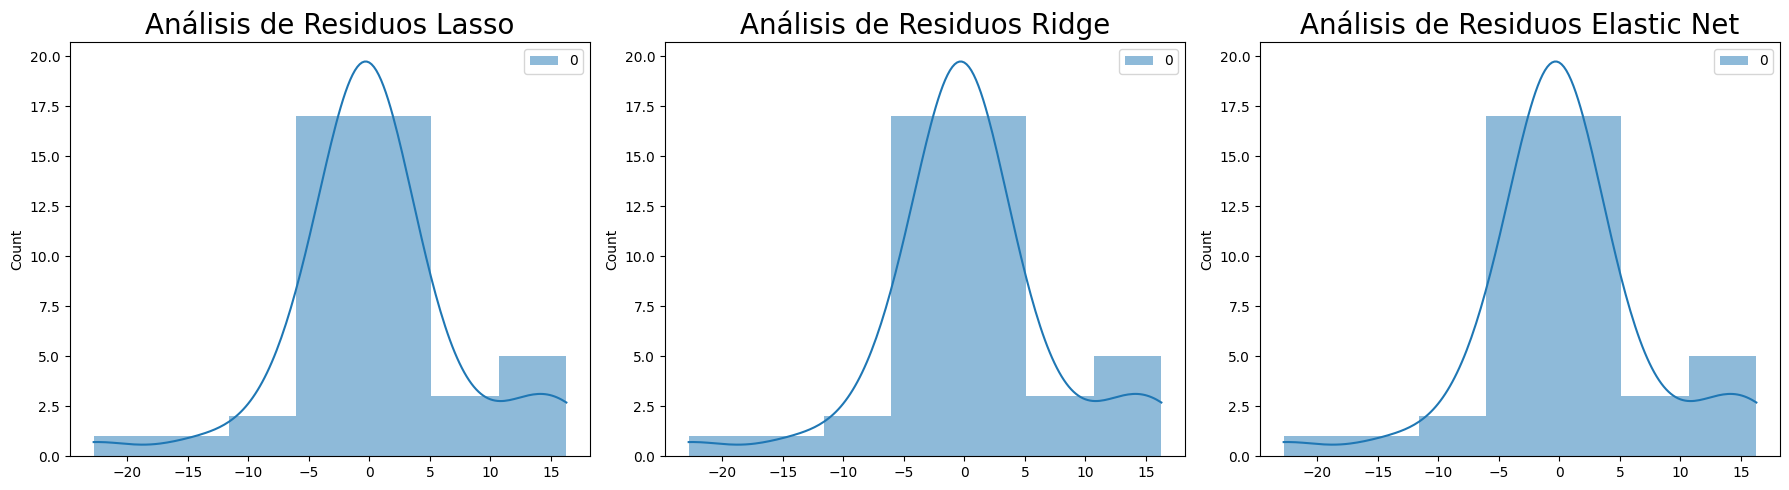

In [220]:
from math import sqrt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

y_val_best_lasso: np.ndarray = modelos[12][-1].predict(X_val)
y_val_best_ridge: np.ndarray = modelos[0][-1].predict(X_val)
y_val_best_elastic: np.ndarray = modelos[3][-1].predict(X_val)

sns.histplot(y_val - y_val_best_lasso.reshape(-1,1), color="red", kde=True, linewidth=0, bins=round(sqrt(len(y_val))), ax=axes[0])
axes[0].set_title('Análisis de Residuos Lasso', fontsize=20)

sns.histplot(y_val - y_val_best_ridge.reshape(-1,1), color="red", kde=True, linewidth=0, bins=round(sqrt(len(y_val))), ax=axes[1])
axes[1].set_title('Análisis de Residuos Ridge', fontsize=20)

sns.histplot(y_val - y_val_best_elastic.reshape(-1,1), color="r", kde=True, linewidth=0, bins=round(sqrt(len(y_val))), ax=axes[2])
axes[2].set_title('Análisis de Residuos Elastic Net', fontsize=20)


plt.tight_layout()
plt.show()

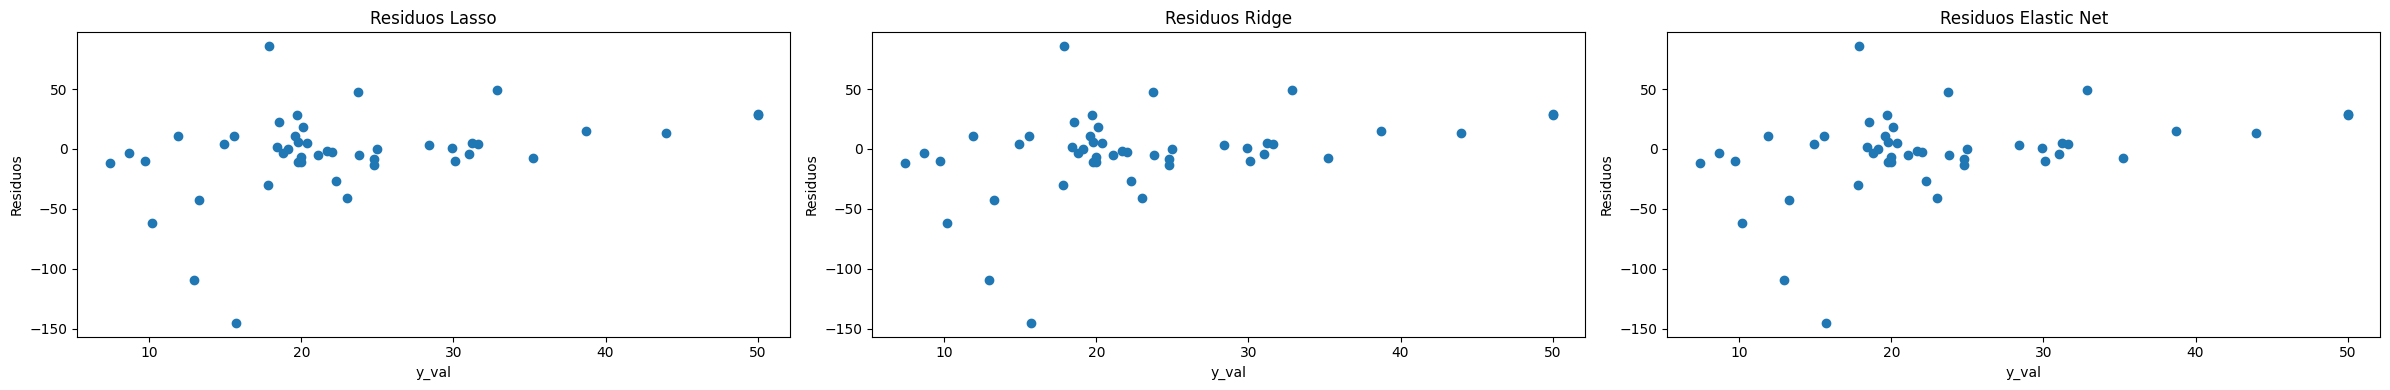

In [221]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 4))

axes[0].scatter(y_val, 100 * (y_val - y_val_best_lasso.reshape(-1, 1)) / y_val)
axes[0].set_title('Residuos Lasso')
axes[0].set_xlabel('y_val')
axes[0].set_ylabel('Residuos')

axes[1].scatter(y_val, 100 * (y_val - y_val_best_ridge.reshape(-1, 1)) / y_val)
axes[1].set_title('Residuos Ridge')
axes[1].set_xlabel('y_val')
axes[1].set_ylabel('Residuos')

axes[2].scatter(y_val, 100 * (y_val - y_val_best_elastic.reshape(-1, 1)) / y_val)
axes[2].set_title('Residuos Elastic Net')
axes[2].set_xlabel('y_val')
axes[2].set_ylabel('Residuos')

plt.tight_layout()
plt.show()

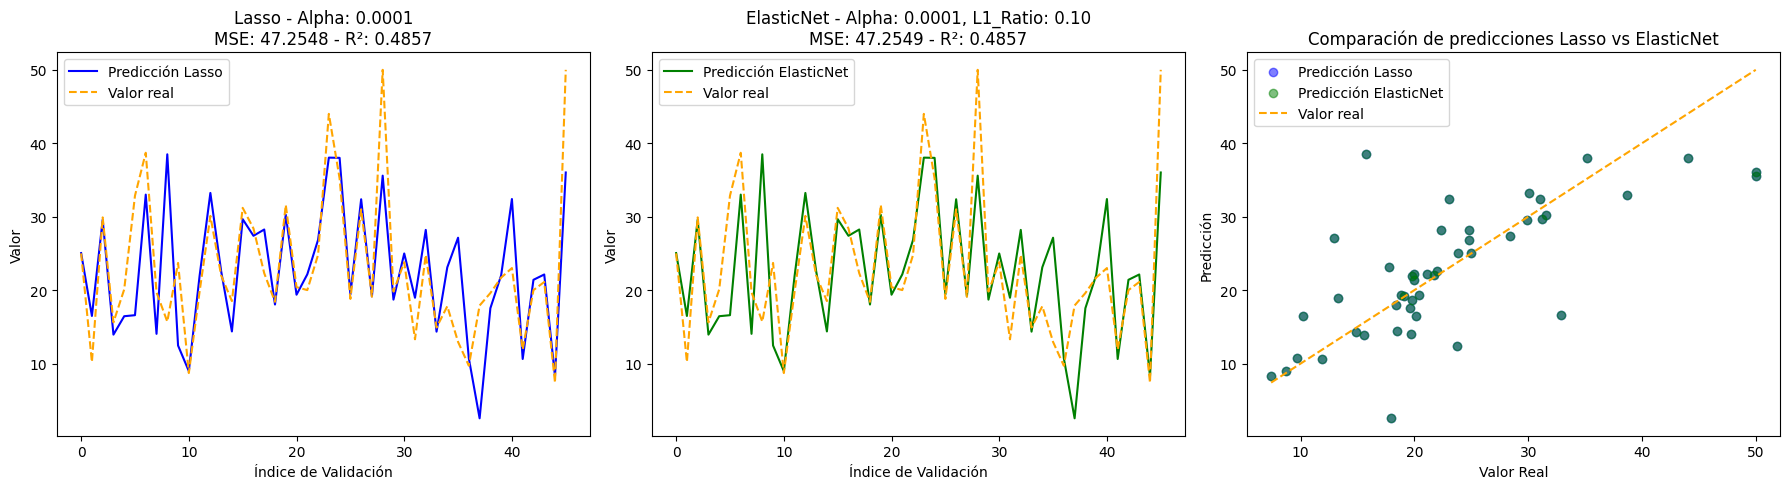

In [222]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

best_lasso_index: int = 12
best_elastic_index: int = 3

y_val_best_lasso: np.ndarray = modelos[12][-1].predict(X_val)
y_val_best_elastic: np.ndarray = modelos[3][-1].predict(X_val)

# Gráfico 1: Evaluación de los parámetros de Lasso
lasso_model: Lasso = modelos[best_lasso_index][-1]
alpha_lasso: float = lasso_model.alpha
mse_lasso: float = mean_squared_error(y_val, y_val_best_lasso)
r2_lasso: float = r2_score(y_val, y_val_best_lasso)

axes[0].plot(range(len(y_val)), y_val_best_lasso, label='Predicción Lasso', color='blue')
axes[0].plot(range(len(y_val)), y_val, label='Valor real', color='orange', linestyle='dashed')
axes[0].set_title(f'Lasso - Alpha: {alpha_lasso:.4f}\nMSE: {mse_lasso:.4f} - R²: {r2_lasso:.4f}')
axes[0].legend()
axes[0].set_xlabel('Índice de Validación')
axes[0].set_ylabel('Valor')

# Gráfico 2: Evaluación de los parámetros de ElasticNet
elastic_model = modelos[best_elastic_index][-1]
alpha_elastic = elastic_model.alpha
l1_ratio_elastic = elastic_model.l1_ratio
mse_elastic = mean_squared_error(y_val, y_val_best_elastic)
r2_elastic = r2_score(y_val, y_val_best_elastic)

axes[1].plot(range(len(y_val)), y_val_best_elastic, label='Predicción ElasticNet', color='green')
axes[1].plot(range(len(y_val)), y_val, label='Valor real', color='orange', linestyle='dashed')
axes[1].set_title(f'ElasticNet - Alpha: {alpha_elastic:.4f}, L1_Ratio: {l1_ratio_elastic:.2f}\nMSE: {mse_elastic:.4f} - R²: {r2_elastic:.4f}')
axes[1].legend()
axes[1].set_xlabel('Índice de Validación')
axes[1].set_ylabel('Valor')

# Gráfico 3: Comparación de predicciones Lasso vs ElasticNet
axes[2].scatter(y_val, y_val_best_lasso, label='Predicción Lasso', color='blue', alpha=0.5)
axes[2].scatter(y_val, y_val_best_elastic, label='Predicción ElasticNet', color='green', alpha=0.5)
axes[2].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='orange', linestyle='dashed', label='Valor real')
axes[2].set_title('Comparación de predicciones Lasso vs ElasticNet')
axes[2].legend()
axes[2].set_xlabel('Valor Real')
axes[2].set_ylabel('Predicción')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### **Observaciones:**
1. **Gráfico de Lasso**:
   - Los resultados indican que el modelo sigue de cerca los valores reales, aunque en ciertos puntos parece desviarse significativamente, especialmente en los picos y valles más pronunciados.
   - El gráfico muestra un **MSE (Error cuadrático medio) de 47.2548** y un **R² de 0.4857**, lo que sugiere que el modelo explica aproximadamente el 48.57% de la varianza de los datos. Esto implica que la capacidad predictiva del modelo es moderada.

2. **Gráfico de ElasticNet**:
   - El comportamiento de las predicciones es similar al del modelo Lasso, aunque puede observarse alguna diferencia menor en ciertos puntos.
   - El **MSE es 47.2549** (casi idéntico al de Lasso) y el **R² también es 0.4857**, lo que sugiere que ambos modelos tienen un desempeño prácticamente equivalente en este conjunto de datos.

3. **Gráfico de comparación de predicciones Lasso vs ElasticNet**:
   - Al observar la distribución de los puntos, se puede ver que ambos modelos tienen un patrón similar, con puntos algo dispersos alrededor de la línea de referencia. Esto indica que ni Lasso ni ElasticNet capturan perfectamente la relación entre las variables, pero sus predicciones están razonablemente cerca.

### Conclusión general:
- Tanto el modelo Lasso como el ElasticNet tienen un rendimiento similar en términos de MSE y R².
- Ninguno de los dos modelos parece tener una ventaja clara sobre el otro en este caso.
- La diferencia principal entre ambos modelos puede residir en cómo manejan las regularizaciones L1 y L2, pero para este conjunto de datos específico, su desempeño predictivo es muy parecido.

### Conclusiones

- **Regresión Lineal:**
  El modelo de regresión lineal mostró un desempeño constante entre el conjunto de validación y de prueba, con un ligero aumento en el RMSE durante la prueba. Esto indica que, si bien la regresión lineal se ajusta bien a los datos, su capacidad para generalizar puede ser limitada en comparación con modelos más complejos.

- **Lasso:**
  Al optimizar los hiperparámetros, Lasso mejoró considerablemente durante la validación. Sin embargo, el rendimiento en el conjunto de prueba fue muy similar al de la regresión lineal, lo que sugiere que la regularización aplicada por Lasso no aporta una mejora significativa en este conjunto de datos, probablemente debido a la simplicidad de las relaciones lineales presentes.

- **Ridge:**
  El modelo Ridge se desempeñó de manera muy estable, con una ligera mejora respecto a la regresión lineal tanto en validación como en prueba. Su bajo RMSE y la estabilidad entre los conjuntos de validación y prueba sugieren que es el modelo más robusto en términos de generalización, ya que muestra menos sobreajuste que otros modelos.

- **ElasticNet:**
  Al igual que Lasso y Ridge, ElasticNet también optimizó los hiperparámetros para obtener mejores resultados en la validación. Sin embargo, su rendimiento en el conjunto de prueba fue comparable al de los modelos anteriores, lo que indica que la combinación de penalizaciones \(L1\) y \(L2\) no proporciona una ventaja significativa para este problema.

- **Gradiente Descendente (GD):**
  Este modelo presentó un rendimiento aceptable en el conjunto de validación, pero su desempeño en la prueba fue considerablemente inferior en comparación con los modelos de regresión. El aumento en el RMSE sugiere que podría haber problemas de convergencia o que el modelo no está capturando las características de los datos de manera adecuada.

- **Mini-Batch GD y SGD:**
  Ambos modelos tuvieron un rendimiento similar en validación y prueba, pero sus MSE en la prueba fueron mayores en comparación con Ridge y Lasso, lo que sugiere que estos métodos no son tan adecuados para este conjunto de datos, a pesar de sus ventajas en términos de eficiencia computacional.

---

### Comparación Final

En los datos de validación, el mejor modelo fue **Ridge**, con un RMSE competitivo en comparación con otros modelos regularizados como Lasso y ElasticNet. Sin embargo, al evaluar el desempeño en el conjunto de prueba, la **regresión lineal** simple fue el modelo que mejor generalizó, probablemente debido a la naturaleza lineal de los datos.

En resumen, aunque los modelos de regularización como Ridge y Lasso suelen ser útiles para evitar el sobreajuste, en este caso, la **Regresión Lineal simple** se destacó por su capacidad de generalización. **Ridge** se presenta como una alternativa sólida si se busca un compromiso entre ajuste y simplicidad. Por último, los modelos de descenso de gradiente mostraron un desempeño inferior, indicando que, para este problema en particular, las técnicas de optimización no lineal no ofrecen una ventaja clara.

